In [35]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


import itertools
from sklearn.metrics import confusion_matrix



In [36]:
import nbimporter
import Building_models_function_to_import



In [37]:
!pip3 install nbimporter


# Datasets

In [38]:
#dataset = 'data/df_stanford_real_features_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
dataset = 'data/df_stanford_fifa_features_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
#dataset = 'data/df_match_with_clusters.csv'
#dataset = 'data/df_merge_dataset_stanford_fifa_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
dataset = 'data/df_stanford_real_features_leagues_[1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
dataset = 'data/df_testing_clustering_app5_[1729]_seasons_[\'15_16\'].csv'
#dataset = 'data/df_stanford_fifa_features_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
# dataset = 'data/df_FTHG_FTAG_[21518]_seasons_[\'15_16\'].csv'
#dataset = 'data/df_FTHG_FTAG_[21518]_seasons_[\'15_16\', \'14_15\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
#dataset = 'data/df_FTHG_FTAG_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
# dataset = 'data/df_merge_df_stanfor_seasons_df_stanfor.csv'
#dataset = 'data/df_merge_df_total_features_df_te.csv'
dataset = 'data/df_stanford_real_features_leagues_[1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
#dataset = 'data/df_stanford_real_features.csv'
#dataset = 'data/df_merge_clustersdata_df_df_te.csv'
dataset = 'data/uuuuudf_merge_clustersdata_df_df_te.csv'

print(dataset)
random_seed =1



data/uuuuudf_merge_clustersdata_df_df_te.csv


## Reading datasets

In [39]:
df = pd.read_csv(dataset)
df.head()

crossing_home  finishing_home  heading_accuracy_home  short_passing_home  \
0          75.25           66.50                  68.75               74.25   
1          84.00           76.75                  81.00               84.50   
2          72.00           73.00                  72.00               75.00   
3          78.75           75.75                  76.75               81.25   
4          73.00           70.00                  70.75               75.75   

   volleys_home  dribbling_home  curve_home  free_kick_accuracy_home  \
0         69.75           68.50       77.50                    74.50   
1         74.75           80.25       81.25                    79.50   
2         74.25           74.25       76.50                    74.00   
3         69.75           70.50       80.25                    76.25   
4         72.50           68.50       76.50                    66.25   

   long_passing_home  ball_control_home   ...    cluster_team_home_5  \
0               70.0               70.0   ...                    0.0   
1               81.8               82.4   ...                    3.0   
2               76.4               75.2   ...                    3.0   
3               72.2               78.6   ...                    0.0   
4               76.0               70.4   ...                    2.0   

   cluster_team_away_6  cluster_team_home_6  cluster_team_away_7  \
0                  5.0                  1.0                  2.0   
1                  3.0                  0.0                  2.0   
2                  3.0                  2.0                  2.0   
3                  5.0                  2.0                  3.0   
4                  1.0                  0.0                  2.0   

   cluster_team_home_7  cluster_team_away_8  cluster_team_home_8  \
0                  1.0                  3.0                  7.0   
1                  6.0                  3.0                  4.0   
2                  3.0                  3.0                  0.0   
3                  5.0                  0.0                  2.0   
4                  4.0                  7.0                  6.0   

   cluster_team_away_9  cluster_team_home_9  labels  
0                  1.0                  6.0       A  
1                  6.0                  7.0       H  
2                  2.0                  3.0       D  
3                  1.0                  5.0       A  
4                  6.0                  4.0       A  

[5 rows x 110 columns]

In [40]:
df.columns

Index(['crossing_home', 'finishing_home', 'heading_accuracy_home',
       'short_passing_home', 'volleys_home', 'dribbling_home', 'curve_home',
       'free_kick_accuracy_home', 'long_passing_home', 'ball_control_home',
       ...
       'cluster_team_home_5', 'cluster_team_away_6', 'cluster_team_home_6',
       'cluster_team_away_7', 'cluster_team_home_7', 'cluster_team_away_8',
       'cluster_team_home_8', 'cluster_team_away_9', 'cluster_team_home_9',
       'labels'],
      dtype='object', length=110)

In [41]:
if dataset.startswith('data/df_stanford_real_'):
    df = df.drop(columns=['home_team_name_id','away_team_name_id'])
#df = df.drop(columns=['home_team_name_id','away_team_name_id','uid'])    

## Split labels from features

In [42]:
labels = df['labels']
features = df.drop(columns = ['labels'])

# Balance of classes

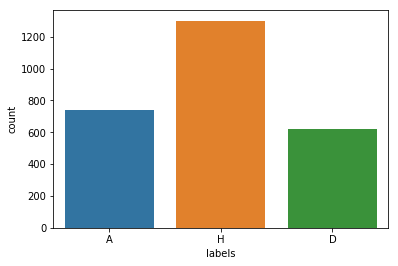

In [43]:
sns.countplot(labels,label="Count")

plt.show()

## Remove Rows With Missing Values

In [44]:
labels = labels[np.invert(features.isnull().any(axis=1))]
features.dropna(inplace=True)


# Functions to convert types

In [45]:
def convert_to(df,type_to_convert, all_categorical = False,columns = 'None'):
 
    if all_categorical == True:
        categoric_types = df.select_dtypes(include=['object','category']).columns
        if categoric_types.empty:
            print('No object types in the dataframe to be converted')
            return df
        else:
            if 'labels' in categoric_types:
                categoric_types.remove('labels')
            df[categoric_types] = df[categoric_types].astype('category')
            columns = categoric_types
        
    else:
        df[columns] = df[columns].astype('category')
        
        
    if type_to_convert == 'labelling':
        for column in columns:
            df[column] = df[column].cat.codes
    elif type_to_convert == 'onehot':
        for column in columns:
            print(columns)
            df= pd.get_dummies(df, columns=[column])             
      
    return df

In [46]:

features = features.drop(columns= 'date')



features = convert_to(features,'labelling', all_categorical = True,columns ='None')


if 'cluster_home' in features.columns:
    features = convert_to(features,'onehot', all_categorical = False,columns =['cluster_home','cluster_away'])



#Change types


# features['FTAG'] = features['FTAG'].astype(int)  #uncomment when fifa players data has stage
# features['FTHG'] = features['FTHG'].astype(int)

features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 10 to 2659
Columns: 108 entries, crossing_home to cluster_team_home_9
dtypes: float64(106), int16(1), int64(1)
memory usage: 1.3 MB


# Create Training and Test Sets and Apply Scaling

In [47]:
X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=random_seed)

In [48]:


X_test.shape


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 2026 to 1513
Columns: 108 entries, crossing_home to cluster_team_home_9
dtypes: float64(106), int16(1), int64(1)
memory usage: 1007.2 KB


In [49]:
scaler = MinMaxScaler()
scaler = StandardScaler()

numeric_types = X_train.select_dtypes(include=['float64','int'])
#print(numeric_types.columns)

#X_train[numeric_types.columns] = scaler.fit_transform(X_train[numeric_types.columns])
#X_test[numeric_types.columns]  = scaler.transform(X_test[numeric_types.columns] )






X_test.head()

crossing_home  finishing_home  heading_accuracy_home  \
2654          80.50           81.50                  84.00   
1025          69.00           72.75                  77.75   
1454          80.75           69.50                  72.75   
1822          79.75           75.00                  78.50   
804           73.00           65.00                  71.75   

      short_passing_home  volleys_home  dribbling_home  curve_home  \
2654               87.50         81.25           85.25       86.75   
1025               69.25         72.00           67.00       70.75   
1454               80.75         60.25           69.25       77.00   
1822               78.75         79.25           73.75       76.50   
804                78.25         69.25           68.00       73.00   

      free_kick_accuracy_home  long_passing_home  ball_control_home  \
2654                    88.75               86.0               76.8   
1025                    63.50               80.2               69.6   
1454                    73.25               77.2               76.8   
1822                    73.75               80.0               80.4   
804                     69.75               77.4               73.0   

             ...           cluster_team_away_5  cluster_team_home_5  \
2654         ...                           4.0                  0.0   
1025         ...                           0.0                  3.0   
1454         ...                           4.0                  0.0   
1822         ...                           2.0                  0.0   
804          ...                           1.0                  3.0   

      cluster_team_away_6  cluster_team_home_6  cluster_team_away_7  \
2654                  2.0                  3.0                  0.0   
1025                  3.0                  2.0                  2.0   
1454                  4.0                  1.0                  4.0   
1822                  3.0                  3.0                  1.0   
804                   5.0                  2.0                  3.0   

      cluster_team_home_7  cluster_team_away_8  cluster_team_home_8  \
2654                  5.0                  0.0                  2.0   
1025                  5.0                  3.0                  2.0   
1454                  2.0                  6.0                  3.0   
1822                  2.0                  1.0                  3.0   
804                   5.0                  0.0                  2.0   

      cluster_team_away_9  cluster_team_home_9  
2654                  8.0                  5.0  
1025                  2.0                  3.0  
1454                  4.0                  6.0  
1822                  2.0                  2.0  
804                   1.0                  3.0  

[5 rows x 108 columns]

# Functions for feature importance

In [50]:
def dropcol_importances(clf, X_train, y_train):
    from sklearn.base import clone
    clf_ = clone(clf)
    clf_.random_state = 999
    clf_.fit(X_train, y_train)
    baseline = clf.score(X_train, y_train)
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        clf_ = clone(clf)
        clf_.random_state = 999
        clf_.fit(X, y_train)
        #o = clf_.oob_score_
        o = clf.score(X_train, y_train)
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I


def permutation_importances(clf, X_train, y_train):
    baseline = clf.score(X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = clf.score(X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


## Logistic regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 2026 to 1513
Columns: 108 entries, crossing_home to cluster_team_home_9
dtypes: float64(106), int16(1), int64(1)
memory usage: 1007.2 KB
Accuracy of Logistic regression classifier on training set: 0.60
Accuracy of Logistic regression classifier on test set: 0.52
F1 Score of Logistic regression classifier on test set: 0.48


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

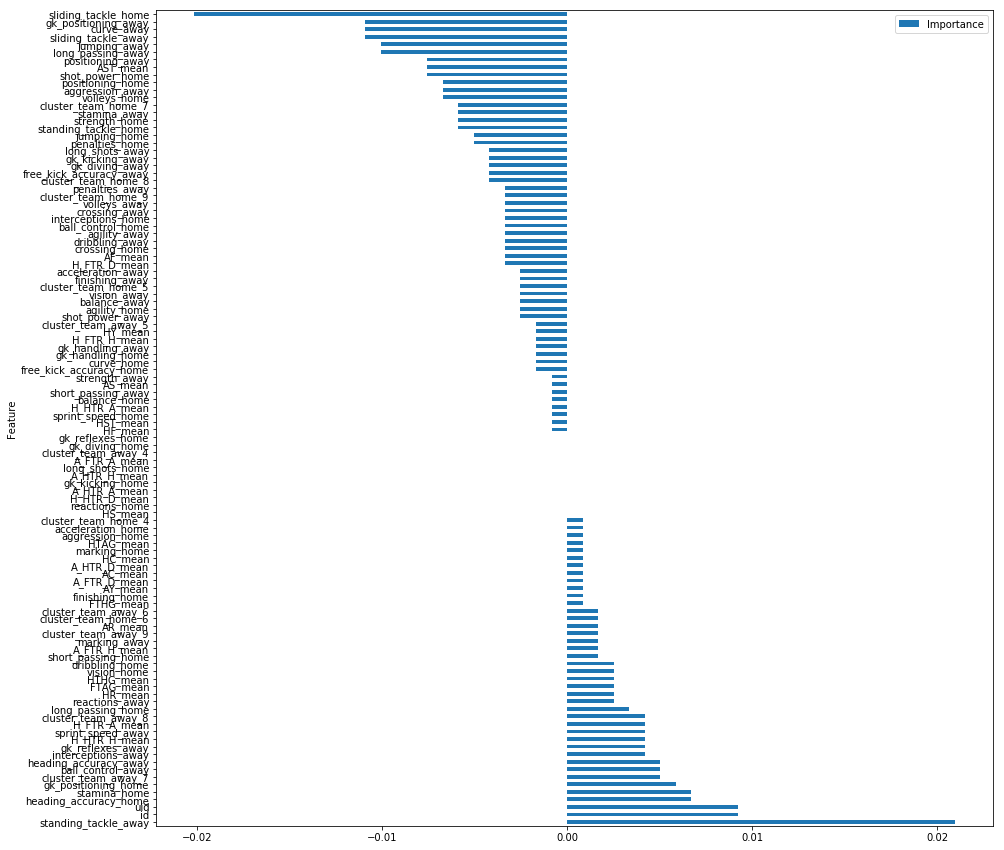

1454 has been classified as  H and should be  A
2295 has been classified as  H and should be  A
1875 has been classified as  D and should be  A
2268 has been classified as  A and should be  H
1560 has been classified as  H and should be  D
178 has been classified as  D and should be  H
1763 has been classified as  H and should be  D
1405 has been classified as  H and should be  A
793 has been classified as  H and should be  A
521 has been classified as  D and should be  H
1432 has been classified as  H and should be  A
1674 has been classified as  A and should be  H
18 has been classified as  H and should be  A
1210 has been classified as  H and should be  D
1693 has been classified as  H and should be  A
2532 has been classified as  A and should be  H
988 has been classified as  H and should be  D
824 has been classified as  D and should be  A
1478 has been classified as  D and should be  A
718 has been classified as  H and should be  A
582 has been classified as  H and should be  D
5

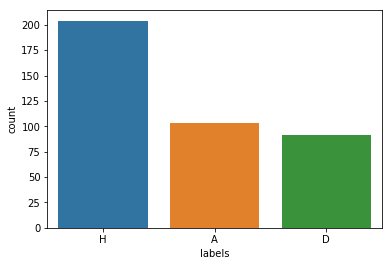

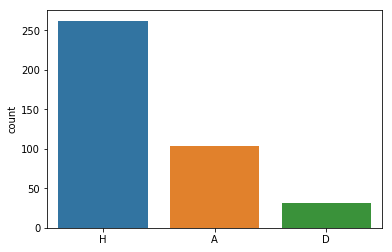

Confusion matrix, without normalization
[[  8  58  25]
 [ 12 156  36]
 [ 12  48  43]]
Normalized confusion matrix
[[0.09 0.64 0.27]
 [0.06 0.76 0.18]
 [0.12 0.47 0.42]]


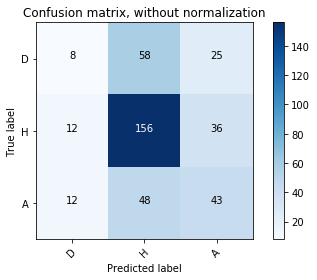

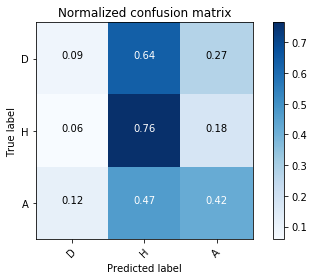

In [52]:
X_train.info()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


y_predict = logreg.predict(X_test)
print('F1 Score of Logistic regression classifier on test set: {:.2f}'
     .format(f1_score(y_test, y_predict, average='weighted')))


fi = dropcol_importances(logreg, X_train, y_train)
fi = permutation_importances(logreg, X_train, y_train)



fi.plot(kind='barh',figsize=(15,15))
plt.show()

predictions = logreg.predict(X_test)
for input, prediction, label in zip(X_test.index, predictions, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label) 

list(zip(X_test, predictions, y_test))
print(X_test.head())

sns.countplot(y_test,label="Count")
plt.show()
sns.countplot(predictions,label="Count")
plt.show()

class_names = list(set(y_test))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,labels=class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## SVC

In [53]:
svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

y_predict = svm.predict(X_test)
print('F1 Score of SVC classifier on test set: {:.2f}'
     .format(f1_score(y_test, y_predict, average='weighted')))

# dropcol_importances(svm, X_train, y_train)
# permutation_importances(svm, X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.51
F1 Score of SVC classifier on test set: 0.35


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1025 has been classified as  H and should be  A
1454 has been classified as  H and should be  A
804 has been classified as  H and should be  A
2295 has been classified as  H and should be  A
1875 has been classified as  H and should be  A
1912 has been classified as  H and should be  A
797 has been classified as  H and should be  A
1560 has been classified as  H and should be  D
1763 has been classified as  H and should be  D
1518 has been classified as  H and should be  D
1405 has been classified as  H and should be  A
403 has been classified as  H and should be  D
793 has been classified as  H and should be  A
1543 has been classified as  H and should be  A
1432 has been classified as  H and should be  A
18 has been classified as  H and should be  A
1210 has been classified as  H and should be  D
1338 has been classified as  H and should be  A
1693 has been classified as  H and should be  A
373 has been classified as  H and should be  A
988 has been classified as  H and should be  D


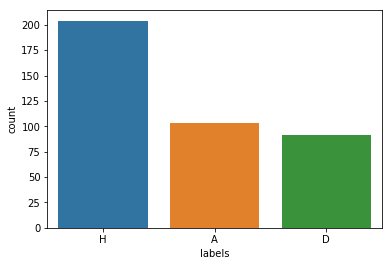

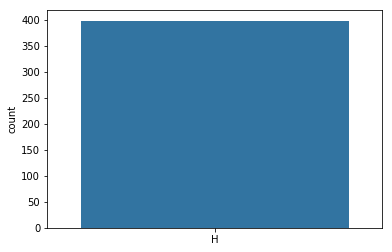

Confusion matrix, without normalization
[[  0  91   0]
 [  0 204   0]
 [  0 103   0]]
Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


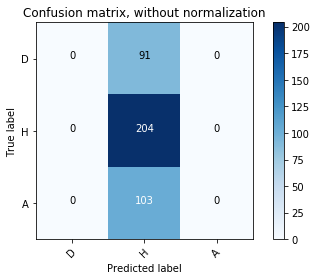

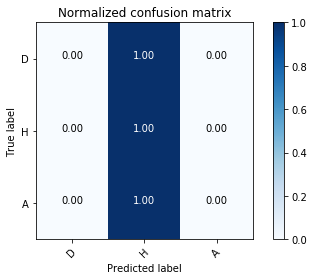

In [54]:
predictions = svm.predict(X_test)
for input, prediction, label in zip(X_test.index, predictions, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label) 

list(zip(X_test, predictions, y_test))
X_test.head()


sns.countplot(y_test,label="Count")
plt.show()
sns.countplot(predictions,label="Count")
plt.show()



class_names = list(set(y_test))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,labels=class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [55]:
list(labels)

['H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'D',
 'H',
 'A',
 'D',
 'H',
 'H',
 'H',
 'H',
 'A',
 'D',
 'H',
 'A',
 'H',
 'H',
 'D',
 'D',
 'A',
 'H',
 'D',
 'H',
 'A',
 'A',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'D',
 'A',
 'H',
 'H',
 'H',
 'D',
 'D',
 'H',
 'D',
 'D',
 'A',
 'D',
 'H',
 'D',
 'D',
 'D',
 'H',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'A',
 'D',
 'H',
 'A',
 'D',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'D',
 'H',
 'H',
 'H',
 'H',
 'A',
 'A',
 'A',
 'D',
 'D',
 'A',
 'A',
 'A',
 'D',
 'H',
 'D',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'D',
 'A',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'D',
 'H',
 'D',
 'D',
 'H',
 'H',
 'D',
 'A',
 'H',
 'H',
 'D',
 'D',
 'H',
 'D',
 'H',
 'H',
 'H',
 'A',
 'A',
 'H',
 'H',
 'H',
 'A',
 'D',
 'H',
 'D',
 'A',
 'H',
 'H',
 'D',
 'A',
 'A',
 'H',
 'D',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'D',
 'D',
 'D',
 'A',
 'H',
 'H',
 'D',
 'D',
 'A',
 'A',
 'H',
 'D',
 'H',
 'A',
 'A',
 'H',
 'A',
 'D',
 'A'

# Random Forest

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Accuracy of RF classifier on training set: 0.69
Accuracy of RF classifier on test set: 0.56
F1 Score of RF classifier on test set: 0.49


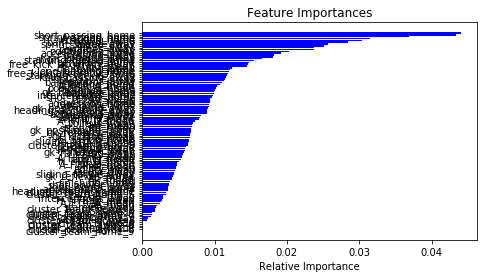

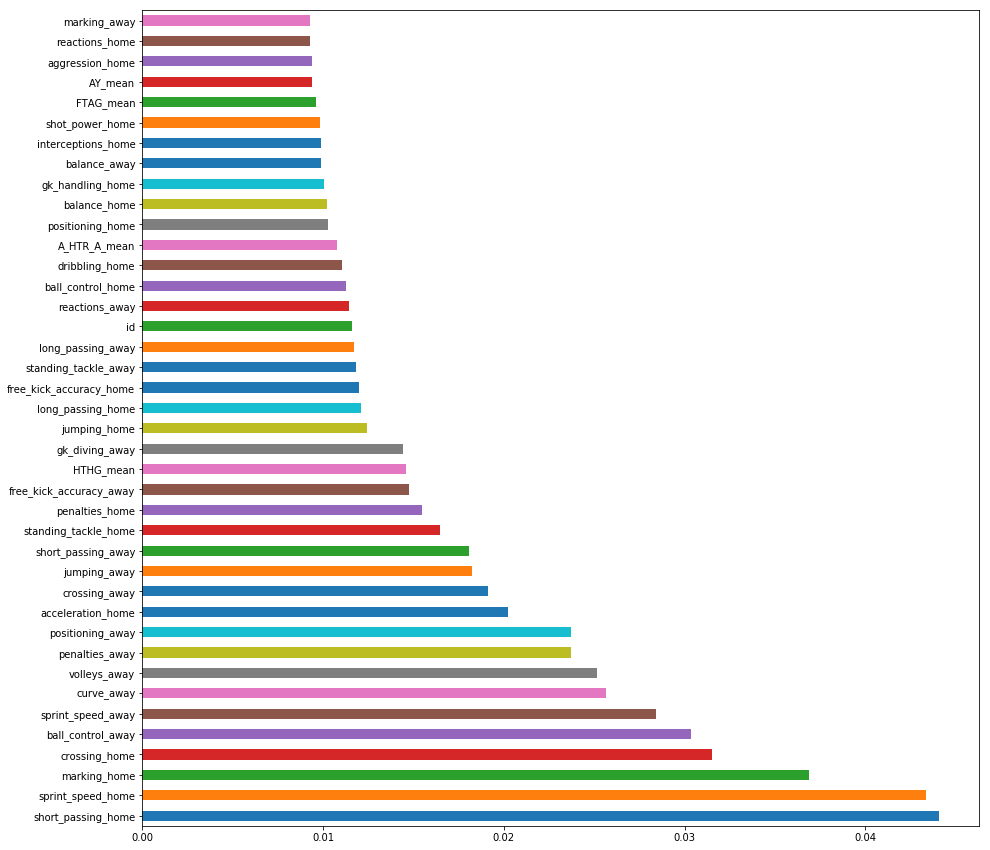

In [63]:
rf = RandomForestClassifier(oob_score=True, max_depth=6)
# X_train = X_train[['FTHG','FTAG']]
# X_test = X_test[['FTHG','FTAG']]

rf.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

y_predict = rf.predict(X_test)
print('F1 Score of RF classifier on test set: {:.2f}'
     .format(f1_score(y_test, y_predict, average='weighted')))


features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
type(feat_importances)
fig =plt.subplots(figsize=(15,15))
feat_importances.nlargest(40).plot(kind='barh')

1875 has been classified as  D and should be  A
2360 has been classified as  A and should be  H
2268 has been classified as  A and should be  H
1560 has been classified as  H and should be  D
1763 has been classified as  H and should be  D
1518 has been classified as  H and should be  D
1405 has been classified as  H and should be  A
1533 has been classified as  A and should be  H
403 has been classified as  H and should be  D
1432 has been classified as  H and should be  A
1674 has been classified as  A and should be  H
1210 has been classified as  H and should be  D
1693 has been classified as  H and should be  A
988 has been classified as  H and should be  D
718 has been classified as  H and should be  A
582 has been classified as  H and should be  D
584 has been classified as  H and should be  A
1932 has been classified as  H and should be  D
1452 has been classified as  A and should be  H
1379 has been classified as  H and should be  A
2579 has been classified as  H and should be 

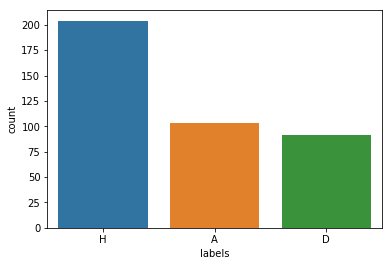

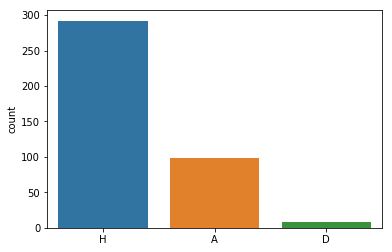

In [57]:
#X_train['random'] = np.random.random(size=len(X_train))

# dropcol_importances(rf, X_train, y_train)
# permutation_importances(rf, X_train, y_train)


predictions = rf.predict(X_test)
for input, prediction, label in zip(X_test.index, predictions, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label) 

list(zip(X_test, predictions, y_test))
X_test.head()

sns.countplot(y_test,label="Count")
plt.show()
sns.countplot(predictions,label="Count")
plt.show()



## Let's try to convert the label to dummy variables

Confusion matrix, without normalization
[[  1  73  17]
 [  5 169  30]
 [  2  50  51]]
Normalized confusion matrix
[[0.01 0.8  0.19]
 [0.02 0.83 0.15]
 [0.02 0.49 0.5 ]]


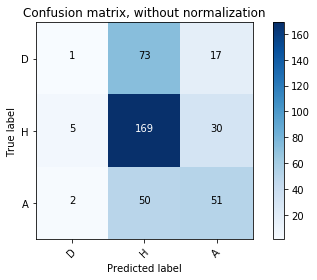

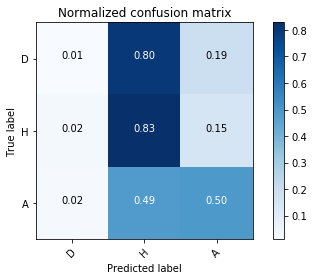

In [58]:



    
class_names = list(set(y_test))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,labels=class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier A on training set: 0.76
Accuracy of Logistic regression classifier A on test set: 0.76
Accuracy of Logistic regression classifier H on training set: 0.69
Accuracy of Logistic regression classifier H on test set: 0.62
Accuracy of Logistic regression classifier D on training set: 0.79
Accuracy of Logistic regression classifier D on test set: 0.76


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


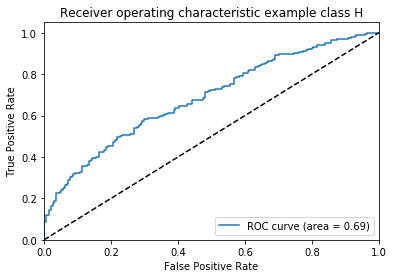

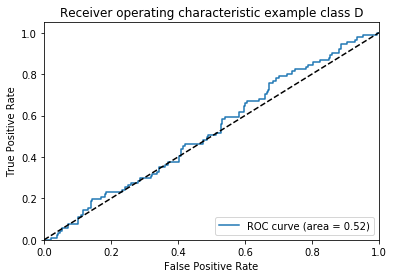

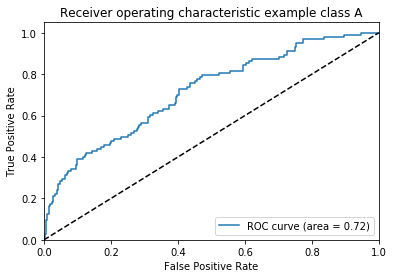

In [59]:
y_train_A = pd.get_dummies(y_train)['A']
y_test_A = pd.get_dummies(y_test)['A']

logreg = LogisticRegression()
logreg.fit(X_train, y_train_A)

print('Accuracy of Logistic regression classifier A on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_A)))

print('Accuracy of Logistic regression classifier A on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_A)))






y_train_H = pd.get_dummies(y_train)['H']
y_test_H = pd.get_dummies(y_test)['H']

logreg = LogisticRegression()
logreg.fit(X_train, y_train_H)

print('Accuracy of Logistic regression classifier H on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_H)))

print('Accuracy of Logistic regression classifier H on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_H)))





y_train_D = pd.get_dummies(y_train)['D']
y_test_D = pd.get_dummies(y_test)['D']

logreg = LogisticRegression()
logreg.fit(X_train, y_train_D)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_D)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_D)))



y_train_bin = label_binarize(y_train, classes=['H','D','A'])
y_test_bin = label_binarize(y_test, classes=['H','D','A'])
n_classes = 3
dict_classes = {0:'H',1:'D',2:'A'}



# classifier
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(X_train, y_train_bin).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example class %s' % dict_classes[i])
    plt.legend(loc="lower right")
    plt.show()


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Logistic regression classifier A on training set: 1.00
Accuracy of Logistic regression classifier A on test set: 0.74


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Logistic regression classifier H on training set: 1.00
Accuracy of Logistic regression classifier H on test set: 0.49


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Logistic regression classifier D on training set: 1.00
Accuracy of Logistic regression classifier D on test set: 0.77


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


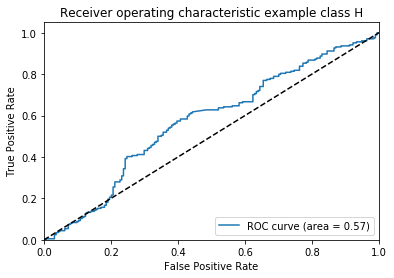

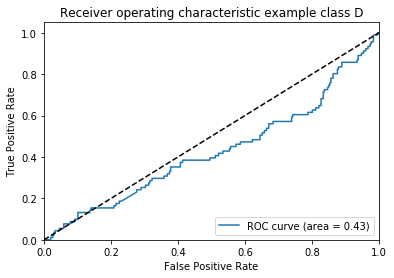

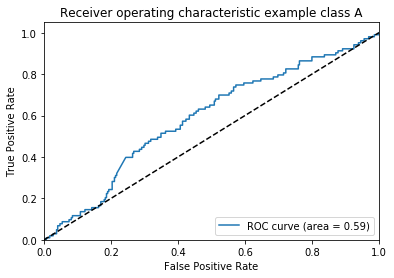

In [60]:
y_train_A = pd.get_dummies(y_train)['A']
y_test_A = pd.get_dummies(y_test)['A']

svc = SVC()
svc.fit(X_train, y_train_A)

print('Accuracy of Logistic regression classifier A on training set: {:.2f}'
     .format(svc.score(X_train, y_train_A)))

print('Accuracy of Logistic regression classifier A on test set: {:.2f}'
     .format(svc.score(X_test, y_test_A)))


y_train_H = pd.get_dummies(y_train)['H']
y_test_H = pd.get_dummies(y_test)['H']

svc = SVC()
svc.fit(X_train, y_train_H)

print('Accuracy of Logistic regression classifier H on training set: {:.2f}'
     .format(svc.score(X_train, y_train_H)))

print('Accuracy of Logistic regression classifier H on test set: {:.2f}'
     .format(svc.score(X_test, y_test_H)))


y_train_D = pd.get_dummies(y_train)['D']
y_test_D = pd.get_dummies(y_test)['D']

svc = SVC()
svc.fit(X_train, y_train_D)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(svc.score(X_train, y_train_D)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(svc.score(X_test, y_test_D)))


# classifier
clf = OneVsRestClassifier(SVC())
y_score = clf.fit(X_train, y_train_bin).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example class %s' % dict_classes[i])
    plt.legend(loc="lower right")
    plt.show()